## 서울지역 스타벅스 매장정보 크롤링 
> - 과제1 : 메인화면 페이지 화면캡쳐 및 저장
- 과제2 : 서울지역 스타벅스 매장정보 크롤링
- 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha100스타 벅스매장수/인구수)
- 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화
- 과제5 : 스벅비율이 반영된 파일을 저장

# Selenium 환경 설정 방법

## 1. Selenium Package Install
> Selenium을 설치하기 위해서는 먼저 아래와 같이 pip 을 사용하여 Selenium Client 모듈을 설치한다.

> - Anaconda Prompt 에서 pip install selenium 실행

### 2. Webdriver Down & Install
> - 가장 보편적으로 많이 사용하는 크롬 웹드라이브를 다운받아서 설치한다.
- 아래 사이트에서 OS에 맞는 웹드라이브를 다운받아 압축을 풀어 driver 폴더에 복사해둔다.
- 크롬 웹드라이브 다운 : https://chromedriver.storage.googleapis.com/index.html?path=2.35/

### 3. WebDriver 로드
> - 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
- 차후 -> 옵션 부여하여 (프록시, 에이전트 조작, 이미지를 배제)
- 크롤링을 오래 돌리면 => 임시파일들이 쌓인다!!
- 1주일정도 돌리다보면 느껴진다. Temp에 막 쌓이므로 -> Temp 파일 삭제

### 미션 : 스타벅스크롤링 과제1~5 수행 

In [3]:
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs

from selenium.webdriver.common.by import By

# 명시적 대기를 위해
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import Image

import numpy as np
import pandas as pd
import platform
import time
import sys

In [4]:
# 드라이브 로드
if platform.system() == 'Darwin':    # MacOS
    driver = wd.Chrome(executable_path='./driver/chromedriver')      
elif platform.system() == 'Windows': # Windows
    driver = wd.Chrome(executable_path='./driver/chromedriver.exe')    
else:
    print("It's unknown system. Hangul fonts are not supported!")

In [5]:
# 사전에 필요한 정보를 로드 => DB 혹은 Shell, Batch File에서 인자로 받아서 셋팅
main_url = 'http://www.istarbucks.co.kr/store/index.do'
keyword  = '서울'

In [6]:
# 매장 정보
store_list = []

In [7]:
# 사이트 접속 (get) : 셀레니움이 하는 일은 사림이 하는일과 최대한 유사하게 동작하도록 작업
time.sleep(2)
driver.get(main_url)

# driver.find_element_by_css_selector('').click()

### 과제1 : 메인화면 페이지 화면캡쳐 및 저장 

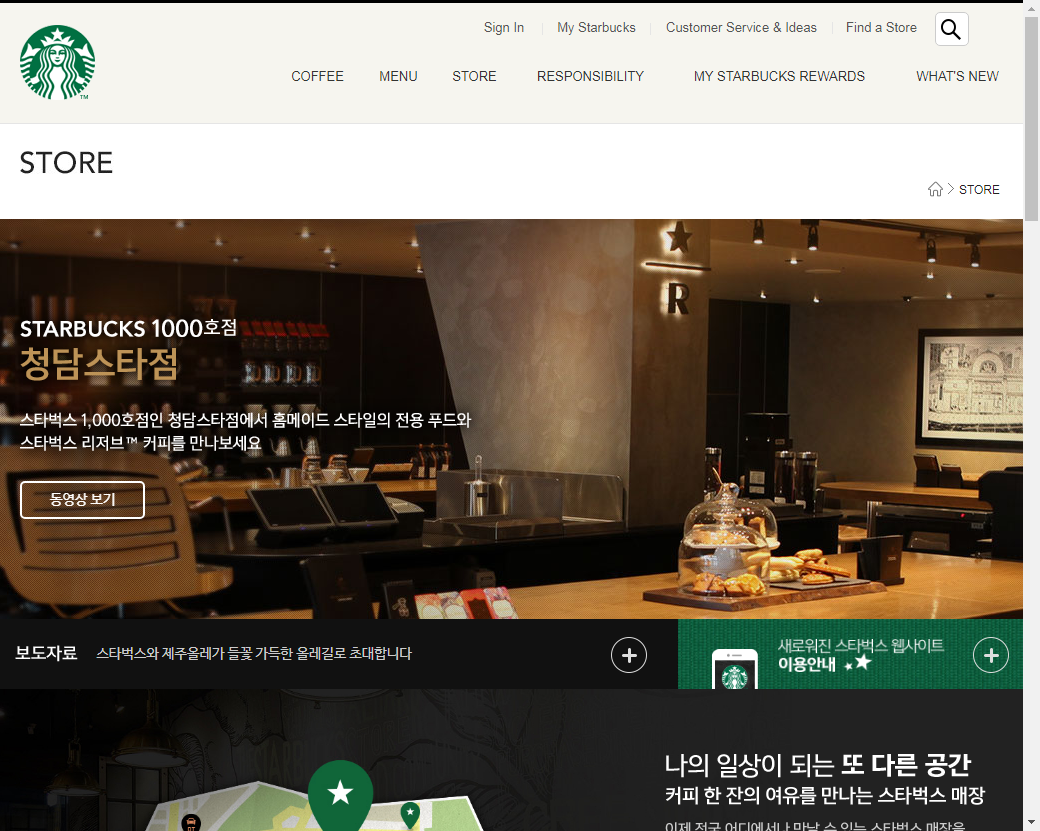

In [8]:
capture_img = './images/istarbucks.png'
driver.save_screenshot(capture_img)
Image(capture_img)

In [9]:
# STORE 메뉴 클릭
# driver.find_element_by_css_selector('#gnb > div > nav > div > ul > li.gnb_nav03 > h2 > a').click()

In [10]:
# 매장찾기 버튼을 클릭, Copy selector
time.sleep(1)
driver.find_element_by_css_selector('#container > section.store_bn1_section > article > div.store_bn1_btn > a').click()

In [11]:
# 지역검색 탭메뉴 클릭
time.sleep(3)
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [12]:
# 서울 클릭
time.sleep(3)
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [13]:
# 전체 클릭
time.sleep(3)
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

### 과제2 : 서울지역 스타벅스 매장정보 크롤링 

In [14]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [15]:
# time.sleep(30)
html = driver.page_source
html[:1000]

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="Starbucks" />\n<meta property="og:url" content="http://www.istarbucks.co.kr/" />\n<meta property="og:image" content="http://www.istarbucks.co.kr/common/img/kakaotalk.png" />\n<meta property="og:description" content="Starbucks" />\n\n<title id="titleJoin">Starbucks Coffee Korea</title>\n<link rel="shortcut icon" href="/common/img/common/favicon.ico" type="image/ico" />\n<link href="/common/css/reset.css" rel="stylesheet" />\n<link href="/common/css/style.css" rel="stylesheet" />\n<link href="/common/css/jquery.bxslider.css" rel="stylesheet" />\n<link href="/common/css/idangerous.swiper.css" rel="styl

In [16]:
# html = urlopen(url)
# soup = BeautifulSoup(html, "lxml")
soup = bs(html, "lxml")

In [17]:
result = soup.find('div', 'result_num_wrap')
result

<div class="result_num_wrap myStoreInfo">
<!-- 검색결과 없는 경우 -->
<!--strong>검색 결과</strong>(<span class="en t_006633">0</span>개)-->
<!-- 검색결과 있는 경우 -->
<strong class="quickSearchResultCtn"></strong> (검색 결과 <span class="en t_006633 resultCtnNumberTab1">10</span>개)<br/>
<span class="store_pop_info"><img alt="" src="/common/img//store/icon_fav_off.png"/> 클릭하여 나만의 매장을 등록하세요.</span>
</div>

In [18]:
type(result)

bs4.element.Tag

In [19]:
result_list = soup.find_all('div', 'result_list_wrap')
len(result_list)

2

In [20]:
# 서울 전체 스타벅스 배장정보
result_list = soup.find('ul', 'quickSearchResultBoxSidoGugun')
len(result_list)

478

In [21]:
type(result_list)

bs4.element.Tag

In [22]:
result_list.get_text()

' 압구정R   서울특별시 강남구 언주로 861 (신사동)02-541-3622 리저브 매장 2번 수서역R   서울특별시 강남구 광평로 281 (수서동)02-6181-3688 리저브 매장 2번 양재강남빌딩R   서울특별시 강남구 남부순환로 2621 (도곡동)02-571-3604 리저브 매장 2번 선릉동신빌딩R   서울특별시 강남구 테헤란로 409 (삼성동)02-2051-3562 리저브 매장 2번 봉은사로선정릉   서울특별시 강남구 봉은사로 446 (삼성동)02-539-3564 리저브 매장 2번 강남오거리   서울특별시 강남구 봉은사로2길 39 (역삼동)02-557-3484 리저브 매장 2번 스타필드코엑스몰R   서울특별시 강남구 영동대로 513 (삼성동)02-6002-3467 리저브 매장 2번 강남구청정문   서울특별시 강남구 학동로 419 (청담동)02-514-3397 리저브 매장 2번 도곡공원   서울특별시 강남구 도곡로 205 (역삼동)02-565-3496 리저브 매장 2번 강남R   서울특별시 강남구 강남대로 390 (역삼동)02-561-3478 리저브 매장 2번 대치은마사거리   서울특별시 강남구 도곡로 457 (대치동)02-554-3315 리저브 매장 2번 청담영동대로   서울특별시 강남구 영동대로 720 (청담동)02-3443-3371 리저브 매장 2번 압구정   서울특별시 강남구 압구정로30길 17 (신사동)02-541-3306 리저브 매장 2번 신사가로수   서울특별시 강남구 압구정로12길 32 (신사동)02-3446-3356 리저브 매장 2번 청담스타R   서울특별시 강남구 도산대로57길 24 (청담동)02-514-3364 리저브 매장 2번 강남우성   서울특별시 강남구 강남대로 328 (역삼동)02-565-3347 리저브 매장 2번 학동사거리   서울특별시 강남구 도산대로 328 (논현동) HS빌딩02-758-8971 리저브 매장 2번 대치사거리   서울특별시 강남구 삼성로 402 (대치동)02-561-3287 리저브 매장 2번 포스코사거리 

In [23]:
stores = result_list.find_all('li')
len(stores)

478

In [24]:
store = stores[0]
store

<li class="quickResultLstCon" data-code="3623" data-hlytag="null" data-index="0" data-lat="37.5273669" data-long="127.033061" data-name="압구정R" data-storecd="1411" style="background:#fff"> <strong>압구정R  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="압구정R" data-store="1411" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 강남구 언주로 861 (신사동)<br/><a href="tel:02-541-3622">02-541-3622</a></p> <i class="pin_reserve">리저브 매장 2번</i></li>

In [25]:
sb_name = store.find('strong').get_text()
sb_name = sb_name.rstrip()
sb_name

'압구정R'

In [26]:
sb_tel = store.find('a').get_text()
sb_tel

'02-541-3622'

In [27]:
sb_addr = store.find('p', 'result_details').get_text()
sb_addr = sb_addr[:sb_addr.find(sb_tel)]
sb_addr

'서울특별시 강남구 언주로 861 (신사동)'

In [28]:
sbucksName = []
sbucksAddr = []
sbucksTel  = []

store_cnt = len(stores)
check_cnt = int(store_cnt/10)
process   = 0

for i in range(store_cnt):
    store = stores[i]
    
    sb_name = store.find('strong').get_text()
    sb_name = sb_name.rstrip()
    sb_tel  = store.find('a').get_text()
    sb_addr = store.find('p', 'result_details').get_text()
    sb_addr = sb_addr[:sb_addr.find(sb_tel)]
    
    sbucksName.append(sb_name)
    sbucksAddr.append(sb_addr)
    sbucksTel.append(sb_tel)
    
    if(i == 0):
        print('crawling is started !')
    elif(i%check_cnt == 0):
        time.sleep(1)
        process += 10
        print('crawling process %d %% ' % (process))
    

crawling is started !
crawling process 10 % 
crawling process 20 % 
crawling process 30 % 
crawling process 40 % 
crawling process 50 % 
crawling process 60 % 
crawling process 70 % 
crawling process 80 % 
crawling process 90 % 
crawling process 100 % 


In [29]:
len(sbucksName), len(sbucksAddr), len(sbucksTel)

(478, 478, 478)

In [30]:
sbucksName[:10]

['압구정R',
 '수서역R',
 '양재강남빌딩R',
 '선릉동신빌딩R',
 '봉은사로선정릉',
 '강남오거리',
 '스타필드코엑스몰R',
 '강남구청정문',
 '도곡공원',
 '강남R']

In [31]:
sbucksTel[:10]

['02-541-3622',
 '02-6181-3688',
 '02-571-3604',
 '02-2051-3562',
 '02-539-3564',
 '02-557-3484',
 '02-6002-3467',
 '02-514-3397',
 '02-565-3496',
 '02-561-3478']

In [32]:
sbucksAddr[:10]

['서울특별시 강남구 언주로 861 (신사동)',
 '서울특별시 강남구 광평로 281 (수서동)',
 '서울특별시 강남구 남부순환로 2621 (도곡동)',
 '서울특별시 강남구 테헤란로 409 (삼성동)',
 '서울특별시 강남구 봉은사로 446 (삼성동)',
 '서울특별시 강남구 봉은사로2길 39 (역삼동)',
 '서울특별시 강남구 영동대로 513 (삼성동)',
 '서울특별시 강남구 학동로 419 (청담동)',
 '서울특별시 강남구 도곡로 205 (역삼동)',
 '서울특별시 강남구 강남대로 390 (역삼동)']

In [33]:
sb_addr = sbucksAddr[0].split()
sb_addr

['서울특별시', '강남구', '언주로', '861', '(신사동)']

In [34]:
sb_addr[1]

'강남구'

In [35]:
sbuksGu = [sb_addr.split()[1] for sb_addr in sbucksAddr]

In [36]:
len(sbuksGu)

478

In [37]:
sbuksGu[:10]

['강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구']

In [38]:
starbucks = pd.DataFrame({'스타벅스매장':sbucksName, 
                          '구'          :sbuksGu, 
                          '주소'        :sbucksAddr, 
                          '전화번호'    :sbucksTel, 
                         })

starbucks.head(10)

,스타벅스매장,구,주소,전화번호
0,압구정R,강남구,서울특별시 강남구 언주로 861 (신사동),02-541-3622
1,수서역R,강남구,서울특별시 강남구 광평로 281 (수서동),02-6181-3688
2,양재강남빌딩R,강남구,서울특별시 강남구 남부순환로 2621 (도곡동),02-571-3604
3,선릉동신빌딩R,강남구,서울특별시 강남구 테헤란로 409 (삼성동),02-2051-3562
4,봉은사로선정릉,강남구,서울특별시 강남구 봉은사로 446 (삼성동),02-539-3564
5,강남오거리,강남구,서울특별시 강남구 봉은사로2길 39 (역삼동),02-557-3484
6,스타필드코엑스몰R,강남구,서울특별시 강남구 영동대로 513 (삼성동),02-6002-3467
7,강남구청정문,강남구,서울특별시 강남구 학동로 419 (청담동),02-514-3397
8,도곡공원,강남구,서울특별시 강남구 도곡로 205 (역삼동),02-565-3496
9,강남R,강남구,서울특별시 강남구 강남대로 390 (역삼동),02-561-3478


In [39]:
starbucks.tail()

,스타벅스매장,구,주소,전화번호
473,중랑역,중랑구,서울특별시 중랑구 망우로30길 3 (상봉동),02-758-8935
474,중랑구청,중랑구,서울특별시 중랑구 신내로 72,02-758-8887
475,사가정역,중랑구,서울특별시 중랑구 면목로 310,02-758-8823
476,상봉역,중랑구,"서울특별시 중랑구 망우로 307, ,3,4번지 (상봉동)",02-758-8486
477,묵동이마트,중랑구,"서울특별시 중랑구 동일로 932, 묵동이마트 B1층 (묵동)",02-758-8370


In [40]:
starbucks["구"].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [41]:
sbucks_count = starbucks["구"].value_counts()
sbucks_count

강남구     71
중구      48
서초구     45
종로구     38
영등포구    33
마포구     32
송파구     27
서대문구    20
용산구     17
양천구     14
강서구     14
광진구     13
성북구     12
구로구     10
노원구     10
금천구     10
강동구     10
성동구      9
동대문구     9
관악구      9
은평구      8
동작구      7
중랑구      6
강북구      5
도봉구      1
Name: 구, dtype: int64

### 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha*100*스타벅스매장수/인구수) 

In [56]:
population = pd.read_csv('data/seoul_population_cctv.csv', sep=',', encoding='euc-kr')
population.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [57]:
population.set_index('구', inplace=True)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구,,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,0.528147,893.971889
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,0.855207,751.225257
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750


In [58]:
sbucks_count.index


Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '양천구',
       '강서구', '광진구', '성북구', '구로구', '노원구', '금천구', '강동구', '성동구', '동대문구', '관악구',
       '은평구', '동작구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [59]:
# 읽어온 파일에 구별 스타벅스 수 추가
population = pd.concat([population, sbucks_count], axis=1)
population.head(10)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,구
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,10
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,14
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,9
광진구,878,53.228621,161714,369999,355032,14967,45202,4.045146,12.216790,0.237298,601.905647,13
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,0.428929,329.195319,10
금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,0.534160,4.641657,10
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770,10
도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,0.240532,625.687072,1


In [60]:
population.rename(columns = {'구':'스타벅스'}, inplace=True)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,스타벅스
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,10
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,14
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,9


In [61]:
population['스타벅스'] / population['인구수'] * 100 * 10000

강남구     129.266006
강동구      22.988929
강북구      15.418964
강서구      23.137895
관악구      17.251790
광진구      35.135230
구로구      22.766908
금천구      39.626088
노원구      18.146548
도봉구       2.915537
동대문구     24.583380
동작구      17.160017
마포구      83.109975
서대문구     62.016081
서초구     101.916252
성동구      28.373534
성북구      26.691935
송파구      40.084207
양천구      29.790720
영등포구     81.739010
용산구      69.363124
은평구      16.398517
종로구     233.005899
중구      354.877346
중랑구      14.667847
dtype: float64

In [62]:
population['스벅비율'] = population['스타벅스'] / population['인구수'] * 100 * 10000

In [63]:
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,스타벅스,스벅비율
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71,129.266006
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,0.232188,540.215648,10,22.988929
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,0.256263,599.442102,5,15.418964
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,14,23.137895
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,9,17.251790


In [64]:
population.sort_values(by='스타벅스', ascending=False).head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,스타벅스,스벅비율
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71,129.266006
중구,1023,147.699758,61232,135258,125815,9443,21902,6.981472,16.192758,0.756332,202.960762,48,354.877346
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750,45,101.916252
종로구,1619,248.922414,73696,163086,153396,9690,26622,5.941650,16.323903,0.992728,362.934662,38,233.005899
영등포구,1277,157.979798,170208,403724,368577,35147,55364,8.705700,13.713329,0.316305,239.389649,33,81.739010


In [65]:
population.sort_values(by='인구수', ascending=False).head(5)

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,스타벅스,스벅비율
송파구,1081,104.347826,269558,673582,666892,6690,80220,0.993198,11.909463,0.160485,727.324414,27,40.084207
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,0.150562,823.205365,14,23.137895
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,0.284175,109.788770,10,18.146548
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71,129.266006
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,0.404267,464.999100,9,17.251790


In [66]:
population.sort_values(by='스벅비율', ascending=False).head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차,스타벅스,스벅비율
중구,1023,147.699758,61232,135258,125815,9443,21902,6.981472,16.192758,0.756332,202.960762,48,354.877346
종로구,1619,248.922414,73696,163086,153396,9690,26622,5.941650,16.323903,0.992728,362.934662,38,233.005899
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,0.589526,1564.173631,71,129.266006
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,0.520226,739.701750,45,101.916252
마포구,980,212.101911,171320,385032,374106,10926,50559,2.837686,13.131116,0.254524,516.168479,32,83.109975


### 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화

In [67]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [68]:
# 스타벅스 수
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스타벅스']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

map

In [69]:
# 인구대비 스타벅스 비율
sbucksData = pd.DataFrame({'gu':population.index, 'counts':population['스벅비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=sbucksData,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

map

### 과제5 : 스벅비율이 반영된 파일을 저장 

In [70]:
# 데이터 저장
population.to_csv('data/seoul_population_sbucks-idx.csv', sep=',', encoding='euc-kr')